# Importing  libraries

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Importing train_test_split

In [46]:
from sklearn.model_selection import train_test_split

# Loading dataset

In [47]:
df = pd.read_csv("titanic_toy.csv")
df.sample(5)

,Age,Fare,Family,Survived
577,39.0,55.9000,1,1
68,17.0,7.9250,6,1
610,39.0,31.2750,6,0
481,NaN,0.0000,0,0
367,NaN,7.2292,0,1


# Displaying concise information about a DataFrame

Also include the data types of columns, the number of non-null values, and memory usage.

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


# Handling missing value

In [49]:
# Checking the percentage of data missing in each column

df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [50]:
# Storing all the input columns in variable 'X' and target column in variable 'y'

X = df.drop(columns=["Survived"])
y = df['Survived']

In [51]:
#  Dividing dataset into two subsets: one for training the model (X_train, y_train) and the other for testing its 
# performance (y_train, y_test), helping evaluate how well the model generalizes to new unseen data.

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [52]:
# Shape of training and testing data

X_train.shape, X_test.shape

((712, 3), (179, 3))

In [53]:
# Percentage of missing data of input columns in training dataset

X_train.isnull().mean()*100

Age       20.786517
Fare       5.056180
Family     0.000000
dtype: float64

In [54]:
# Filling the missing data in the 'Age' column with the value -10 and creating a new column named 'Age_minus10'.

X_train['Age_minus10'] = X_train['Age'].fillna(-1)

In [55]:
# Filling the missing data in the 'Age' column with the value 100 and creating a new column named 'Age_100'.

X_train['Age_100'] = X_train['Age'].fillna(100)

In [56]:
# Filling the missing data in the 'Fare' column with the value -10 and creating a new column named 'Fare_minus10'.

X_train['Fare_minus10'] = X_train['Fare'].fillna(-10)

In [57]:
# Filling the missing data in the 'Fare' column with the value 100 and creating a new column named 'Fare_100'.

X_train['Fare_100'] = X_train['Fare'].fillna(100)

In [58]:
X_train.sample(5)

,Age,Fare,Family,Age_minus10,Age_100,Fare_minus10,Fare_100
39,14.0,11.2417,1,14.0,14.0,11.2417,11.2417
174,56.0,30.6958,0,56.0,56.0,30.6958,30.6958
388,NaN,7.7292,0,-1.0,100.0,7.7292,7.7292
550,17.0,110.8833,2,17.0,17.0,110.8833,110.8833
690,31.0,57.0000,1,31.0,31.0,57.0000,57.0000


# Examing variance

In [59]:
# When using arbitrary value to replace missing values in a dataset, this can potentially lead to a reduction or expansion
# in the variance of the imputed dataset compared to the original dataset, which can impact downstream analyses or modeling.
# To verify this, we are calculating the variance. We check whether the variance of the imputed dataset has significantly  
# changed as compared to the original dataset.

print("Original Age variable variance : ", X_train['Age'].var())
print("Age variance after imputating value -10 : ", X_train['Age_minus10'].var())
print("Age variance after imputating value 100 : ", X_train['Age_100'].var())

print("\n")


print("Original Fare variable variance : ", X_train['Fare'].var())
print("Fare variance after imputating value -10 : ", X_train['Fare_minus10'].var())
print("Fare variance after imputating value 100 : ", X_train['Fare_100'].var())

Original Age variable variance :  204.3495133904614
Age variance after imputating value -10 :  318.0896202624484
Age variance after imputating value 100 :  974.717707779638


Original Fare variable variance :  2448.197913706318
Fare variance after imputating value -10 :  2411.5512454773966
Fare variance after imputating value 100 :  2542.507794332463


As we observe, the variance is significantly changing in the age column. Therefore, we need to exercise caution when imputing missing values and carefully select the optimal strategy.

# Examining distribution

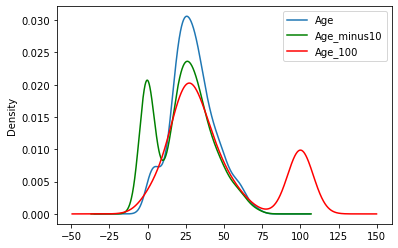

In [60]:
# Now, let's examine the distribution of the original column 'Age', the  'Age_minus10' column, and the 'Age_100' column.

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with value minus10
X_train['Age_minus10'].plot(kind='kde', ax=ax, color='green')

# variable imputed with value 100
X_train['Age_100'].plot(kind='kde', ax=ax, color='red')

# adding legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

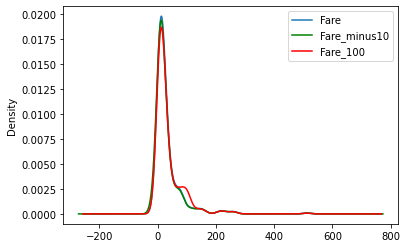

In [61]:
# Now, let's examine the distribution of the original column 'Fare', the 'Fare_minus10' column, and the 'Fare_100' column.

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with value -10
X_train['Fare_minus10'].plot(kind='kde', ax=ax, color='green')

# variable imputed with value 100
X_train['Fare_100'].plot(kind='kde', ax=ax, color='red')

# adding legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

As we can see that, distribution of imputed 'Age_minus10' column and imputed 'Age_100' column is changing as compared to original age column, which shows that it is not good strategy to fill missing value of age column with arbitrary value. 

Whereas in fare column, distribution of all the columns are almost same, which shows that we can fill missing values with the arbitrary values.

# Examining covariance

In [62]:
# We can also check covariance to determine whether the covariance of imputed columns with other columns is the same 
# as that of the original columns with other columns.

X_train.cov()

,Age,Fare,Family,Age_minus10,Age_100,Fare_minus10,Fare_100
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,62.425937,73.367884
Fare,70.719262,2448.197914,17.258917,125.558364,-103.943392,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-4.149246,-7.419667,16.599217,16.046427
Age_minus10,204.349513,125.558364,-4.149246,318.089620,-194.611791,113.107269,128.835701
Age_100,204.349513,-103.943392,-7.419667,-194.611791,974.717708,-95.795213,-103.242242
Fare_minus10,62.425937,2448.197914,16.599217,113.107269,-95.795213,2411.551245,2186.188957
Fare_100,73.367884,2448.197914,16.046427,128.835701,-103.242242,2186.188957,2542.507794


Significant changes in covariance are undesirable.

# Examining correlation

In [63]:
# We can also check correlation to determine whether the correlation of imputed columns with other columns is the 
# same as that of the original columns with other columns.

X_train.corr()

,Age,Fare,Family,Age_minus10,Age_100,Fare_minus10,Fare_100
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.082829,0.095549
Fare,0.092644,1.000000,0.208268,0.142022,-0.066951,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.140668,-0.143697,0.204381,0.192419
Age_minus10,1.000000,0.142022,-0.140668,1.000000,-0.349506,0.129142,0.143262
Age_100,1.000000,-0.066951,-0.143697,-0.349506,1.000000,-0.062482,-0.065582
Fare_minus10,0.082829,1.000000,0.204381,0.129142,-0.062482,1.000000,0.882893
Fare_100,0.095549,1.000000,0.192419,0.143262,-0.065582,0.882893,1.000000


Since correlation values range only between -1 and 1, significant changes in correlation are also undesirable.

# Creating box plots to visualize changes between the original and imputed columns

<AxesSubplot:>

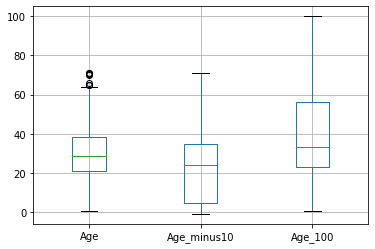

In [64]:
X_train[['Age', 'Age_minus10', 'Age_100']].boxplot()

We can observe that in the imputed columns, the interquartile range has changed, which is a concerning sign.

<AxesSubplot:>

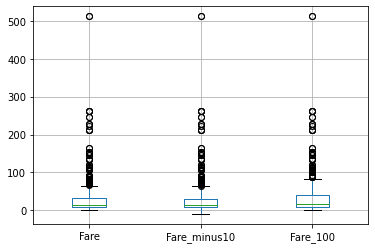

In [65]:
X_train[['Fare', 'Fare_minus10', 'Fare_100']].boxplot()

We can observe that there isn't a significant difference between the original columns and the mean and median imputed columns, which is a positive indication.